<a href="https://colab.research.google.com/github/Rafazand/PCVK_2024/blob/main/PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

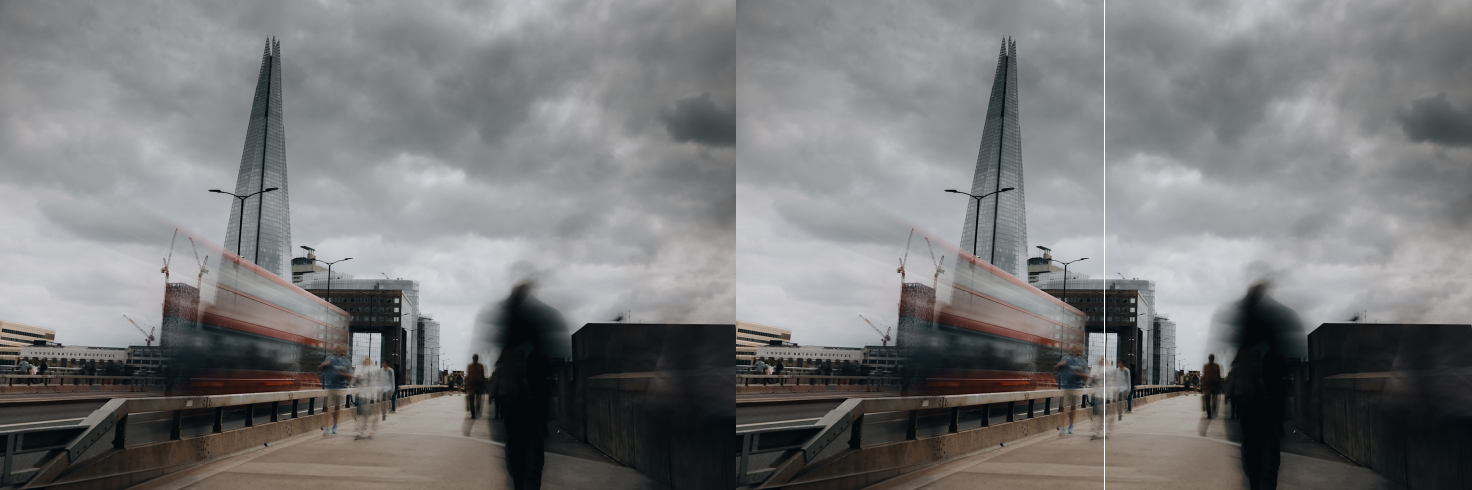

In [3]:
# step 1
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

# Membuat list untuk menyimpan url dari beberapa image
urls = ["https://images.unsplash.com/photo-1724766609759-6c4c589809d4?q=80&w=1471&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"]




# loop pada tiap url image, beberapa image dapat disimpan pada list
for url in urls:
  image = io.imread(url)
  image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
  image_2 = cv.cvtColor (image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat ((image, image_2))
#   cv2_imshow(final_frame)
# print ('\n')




tinggi = image_2.shape[0]
lebar = image_2.shape[1]

# print("resolusi image : tinggi x lebar =", tinggi, "x",lebar )
# cv2_imshow(image_2)


image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Menggambar garis horizontal
# for y in range (lebar):
#   image_3[int((tinggi)/2),y] = [255,0,0]

# final_frame = cv.hconcat ((image_2, image_3))
# cv2_imshow(final_frame)

# Menggambar garis vertikal
# for x in range (tinggi):
#   image_3[x,int((lebar)/2)] = [255,0,0]

image_3[:,int((lebar)/2)] = [255,255,255]
final_frame = cv.hconcat ((image_2, image_3))
cv2_imshow(final_frame)

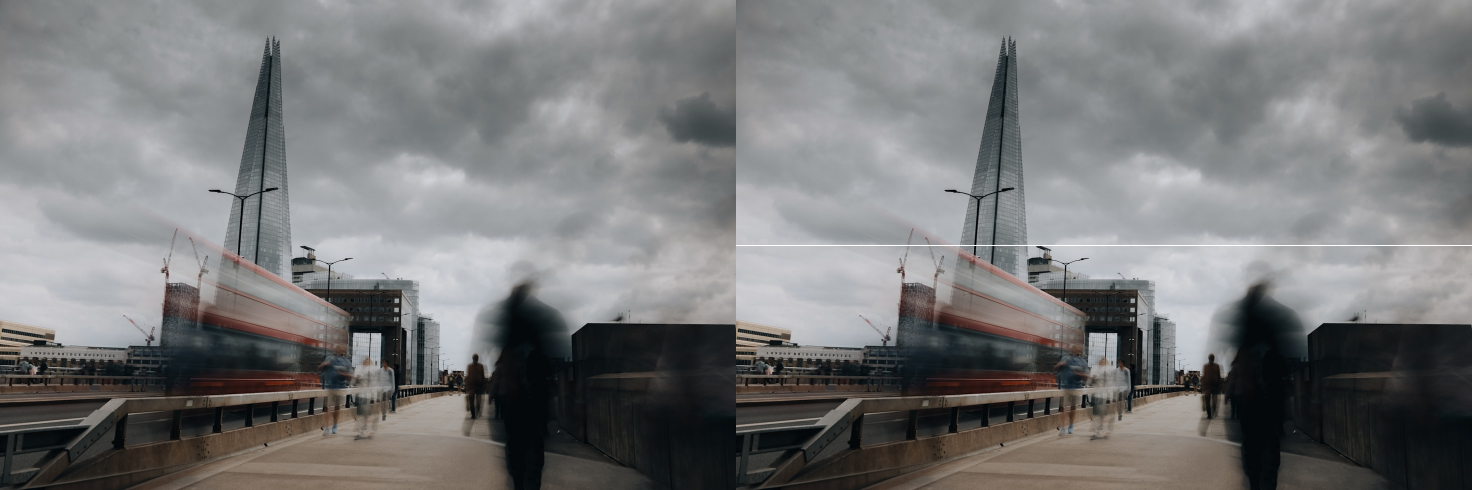

In [15]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

for y in range (lebar):
   image_3[int((tinggi)/2),y] = [255,255,255]

final_frame = cv.hconcat ((image_2, image_3))
cv2_imshow(final_frame)

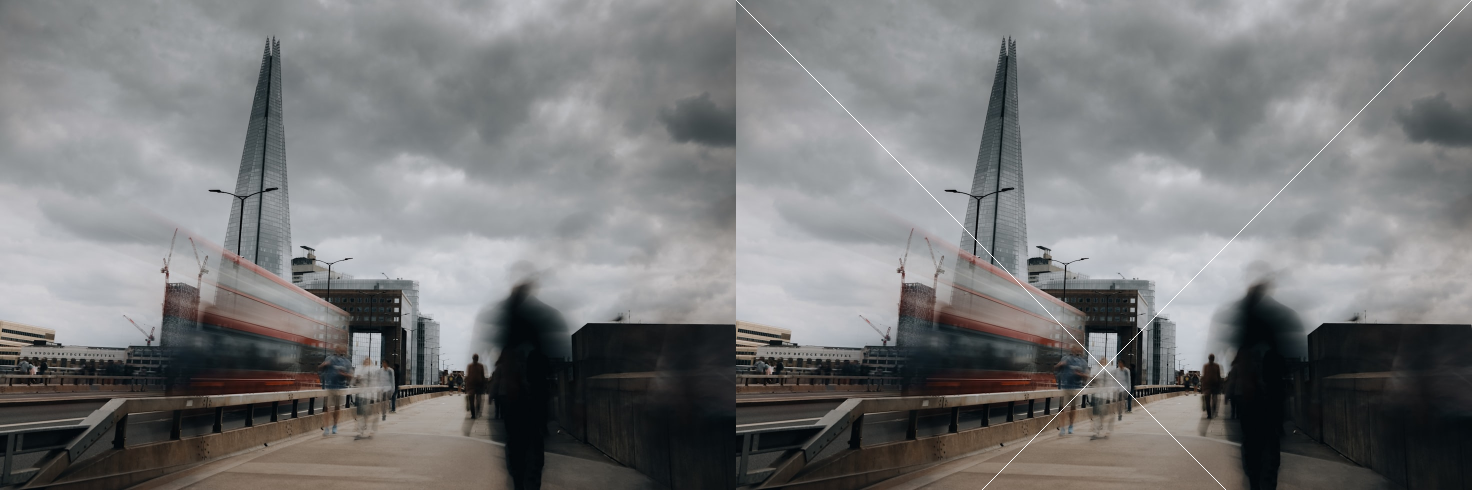

In [13]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#creating crossed line
for i in range(min(tinggi, lebar)):
    image_3[i, i] = [255, 255, 255]

for i in range(min(tinggi, lebar)):
    image_3[i, lebar - 1 - i] = [255, 255, 255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

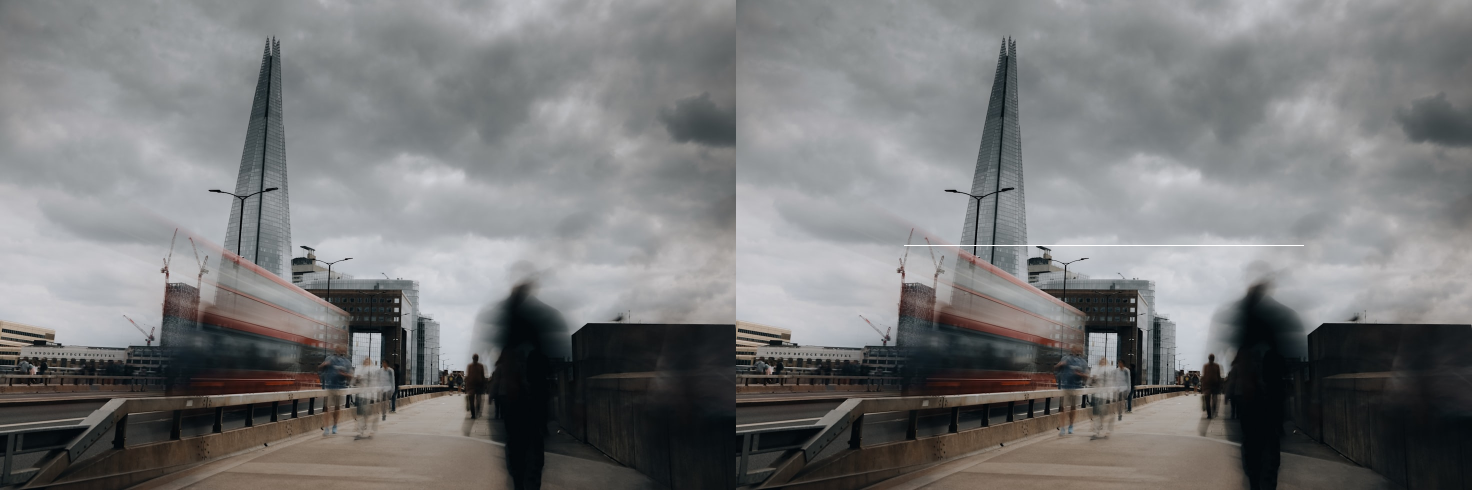

In [7]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#line length
panjang_garis = 400

#counting middle part
tengah_y = int(tinggi / 2)
tengah_x_start = int((lebar - panjang_garis) / 2)
tengah_x_end = tengah_x_start + panjang_garis

#creating horizontal line in midplace
for y in range(tengah_x_start, tengah_x_end):
    image_3[tengah_y, y] = [255, 255, 255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

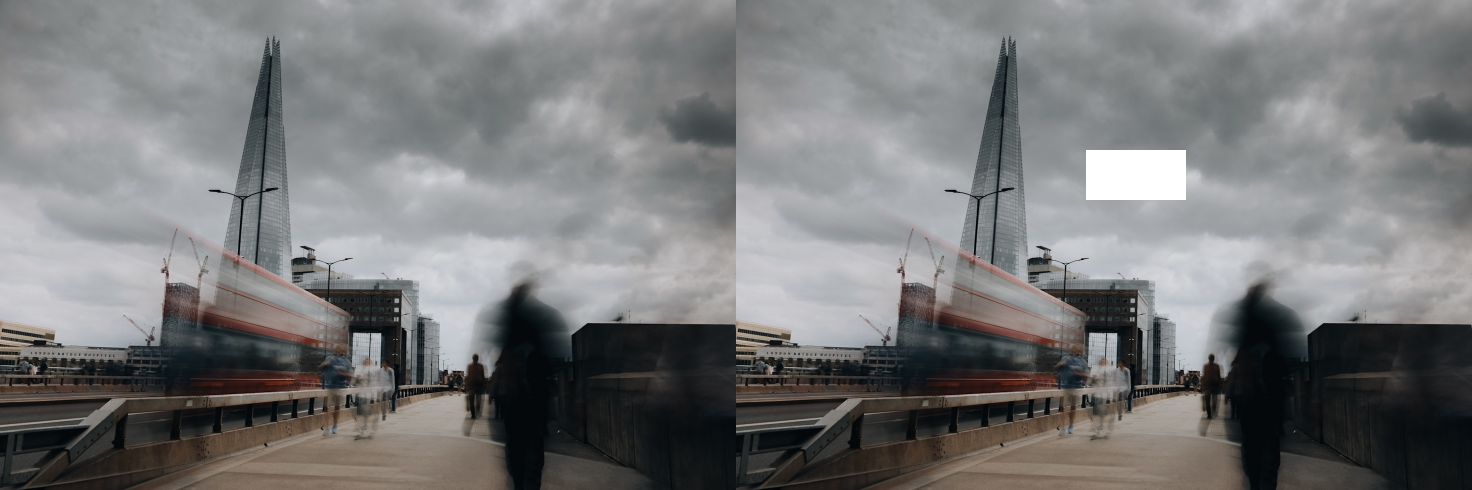

In [12]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#marking the spot
x_start = 350  #x coordinate
y_start = 150  #y coordinate
lebar_kotak = 100  #width
tinggi_kotak = 50   #height

#creating white rectangle
for y in range(y_start, y_start + tinggi_kotak):
    for x in range(x_start, x_start + lebar_kotak):
        if x < lebar and y < tinggi:  #make sure it didnt out from image
            image_3[y, x] = [255, 255, 255]
final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)